## Customer Personality Analysis
This project analyze the marketing_campaign dataset to try and understand connections between 
customer charactaristics to the products he buys.

### 0. Imports

In [3]:
#data processing
import pandas as pd
import numpy as np

#data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Machine learning library
import sklearn

import warnings
warnings.filterwarnings("ignore")


### 1. Introducing marketing dataset

In [40]:
dtf = pd.read_csv("./data/marketing_campaign.csv", index_col=0, delimiter='\t')
cols = ['Year_Birth','Education','Marital_Status','Income',	'Kidhome','Teenhome','Dt_Customer',	'Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds',	'NumDealsPurchases'	,'NumWebPurchases',	'NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1', 'AcceptedCmp2', 'Complain']
dtf = dtf[cols]
dtf.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,8,10,4,7,0,0,0,0,0,0
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,1,2,5,0,0,0,0,0,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,8,2,10,4,0,0,0,0,0,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,2,0,4,6,0,0,0,0,0,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,3,6,5,0,0,0,0,0,0


In [5]:
dtf.describe()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


#### Examining the target features - specific spending(only v.i.p products) 

we can see here how many customers buy gold products in a histogram.

<Axes: >

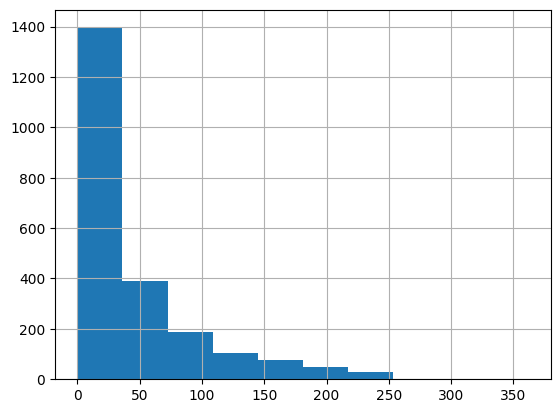

In [6]:
dtf.MntGoldProds.hist()

Text(0, 0.5, 'Gold Product Spending')

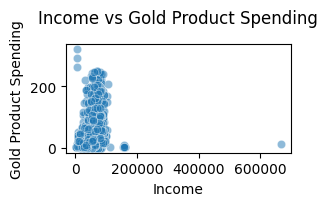

In [9]:
plt.subplot(3, 2, 1)
sns.scatterplot(data=dtf, x='Income', y='MntGoldProds', alpha=0.5)
plt.title('Income vs Gold Product Spending', fontsize=12, pad=15)
plt.xlabel('Income')
plt.ylabel('Gold Product Spending')

Text(0, 0.5, 'Count')

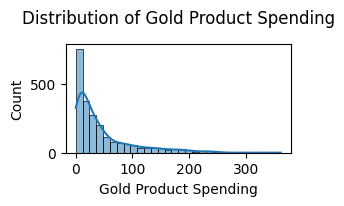

In [10]:
plt.subplot(3, 2, 2)
sns.histplot(data=dtf, x='MntGoldProds', bins=30, kde=True)
plt.title('Distribution of Gold Product Spending', fontsize=12, pad=15)
plt.xlabel('Gold Product Spending')
plt.ylabel('Count')

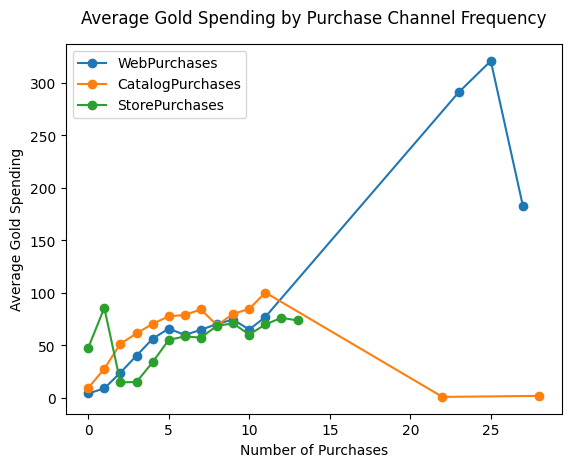

In [35]:
purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
channel_spending = []
for col in purchase_cols:
    spending_by_purchases = dtf.groupby(col)['MntGoldProds'].mean().reset_index()
    plt.plot(spending_by_purchases[col], spending_by_purchases['MntGoldProds'], 
             marker='o', label=col.replace('Num', ''))
plt.title('Average Gold Spending by Purchase Channel Frequency', fontsize=12, pad=15)
plt.xlabel('Number of Purchases')
plt.ylabel('Average Gold Spending')
plt.legend()

<Axes: >

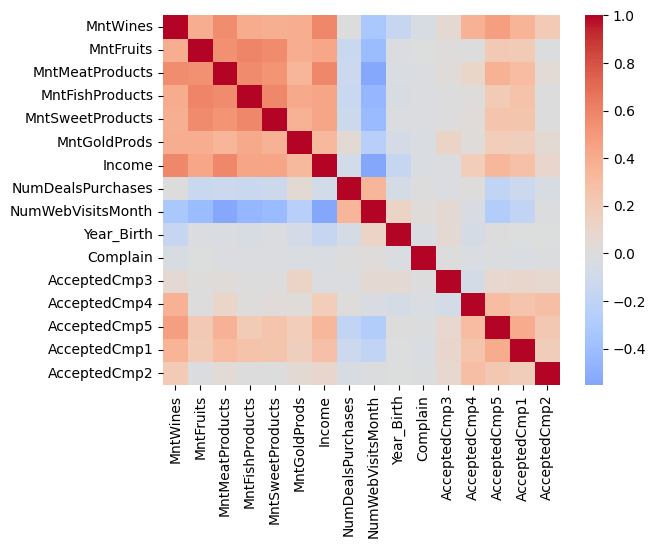

In [26]:
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Income', 'NumDealsPurchases','NumWebVisitsMonth', 'Year_Birth', 'Complain', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']

sns.heatmap(dtf[spending_cols].corr(), cmap='coolwarm', center=0)


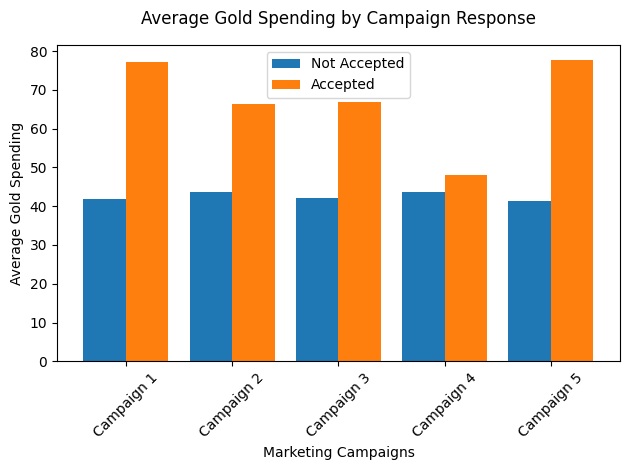

In [32]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                'AcceptedCmp4', 'AcceptedCmp5']
campaign_spending = []
for col in campaign_cols:
    mean_spending = [
        dtf[dtf[col] == 0]['MntGoldProds'].mean(),
        dtf[dtf[col] > 0]['MntGoldProds'].mean()
    ]
    campaign_spending.append(mean_spending)

campaign_data = pd.DataFrame(
    campaign_spending, 
    columns=['Not Accepted', 'Accepted'],
    index=['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5']
)
campaign_data.plot(kind='bar', width=0.8)
plt.title('Average Gold Spending by Campaign Response', fontsize=12, pad=15)
plt.xlabel('Marketing Campaigns')
plt.ylabel('Average Gold Spending')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Gold Product Spending')

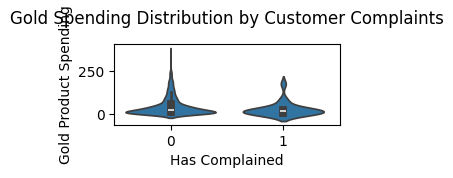

In [38]:
plt.subplot(4, 2, 5)
sns.violinplot(data=dtf, x='Complain', y='MntGoldProds')
plt.title('Gold Spending Distribution by Customer Complaints', fontsize=12, pad=15)
plt.xlabel('Has Complained')
plt.ylabel('Gold Product Spending')

([0, 1, 2, 3, 4],
 [Text(0, 0, '2n Cycle'),
  Text(1, 0, 'Basic'),
  Text(2, 0, 'Graduation'),
  Text(3, 0, 'Master'),
  Text(4, 0, 'PhD')])

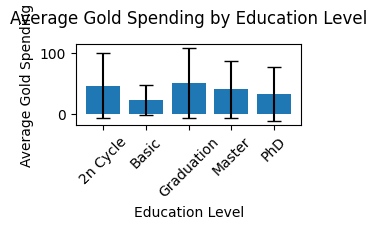

In [41]:
plt.subplot(4, 2, 6)
avg_spending_by_education = dtf.groupby('Education')['MntGoldProds'].agg(['mean', 'std']).reset_index()
plt.bar(avg_spending_by_education['Education'], 
        avg_spending_by_education['mean'],
        yerr=avg_spending_by_education['std'],
        capsize=5)
plt.title('Average Gold Spending by Education Level', fontsize=12, pad=15)
plt.xlabel('Education Level')
plt.ylabel('Average Gold Spending')
plt.xticks(rotation=45)

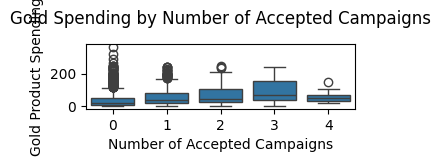

In [43]:
plt.subplot(4, 2, 8)
dtf['TotalAcceptedCampaigns'] = dtf[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                                  'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)
sns.boxplot(data=dtf, x='TotalAcceptedCampaigns', y='MntGoldProds')
plt.title('Gold Spending by Number of Accepted Campaigns', fontsize=12, pad=15)
plt.xlabel('Number of Accepted Campaigns')
plt.ylabel('Gold Product Spending')

plt.tight_layout()
plt.show()